# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Load and Preprocessing data

In [2]:
df = pd.read_csv("C:/ML/Labwork4/dataset/RandomForest/bank-full.csv", sep = ';')

df.columns  =df.columns.str.strip()
for col in df.select_dtypes(include = 'object'):
    df[col] = df[col].str.strip()

target_col = 'y'
x = df.drop(columns = target_col)
y = df[target_col]

# Filter out rare classes
label_counts = y.value_counts()
valid_labels  = label_counts[label_counts >= 2].index
df = df[df[target_col].isin(valid_labels)]
x = df.drop(columns = target_col)
y = df[target_col]

# Split train and test
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 42, stratify = y)

# Preprocessing pipeline
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x.select_dtypes(exclude=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols)
])

# Preprocess data once
preprocessor.fit(x_train_full)
x_train_trans = preprocessor.transform(x_train_full)
x_test_trans = preprocessor.transform(x_test)

# 3. Train Random Forest

In [3]:
K = 100
errors = []
for k in range(K):
    idx = np.random.choice(len(x_train_trans), len(x_train_trans), replace=True)
    X_boot = x_train_trans[idx]
    y_boot = y_train_full.iloc[idx]
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=k)
    rf.fit(X_boot, y_boot)
    y_pred = rf.predict(x_test_trans)
    errors.append(1 - accuracy_score(y_test, y_pred))

# 4. Train Decision Tree

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_trans, y_train_full)
dt_pred = dt.predict(x_test_trans)
dt_error = 1 - accuracy_score(y_test, dt_pred)

# 5. Output comparision

In [5]:
errors = np.array(errors)
print("\n=== Model Comparison ===")
print(f"Decision Tree Error: {dt_error:.4f}")
print(f"Random Forest Mean Error: {errors.mean():.4f}")
print(f"Random Forest Min Error: {errors.min():.4f}")
print(f"Random Forest Max Error: {errors.max():.4f}")


=== Model Comparison ===
Decision Tree Error: 0.1190
Random Forest Mean Error: 0.0948
Random Forest Min Error: 0.0476
Random Forest Max Error: 0.1190


# 6. Plot error distribution

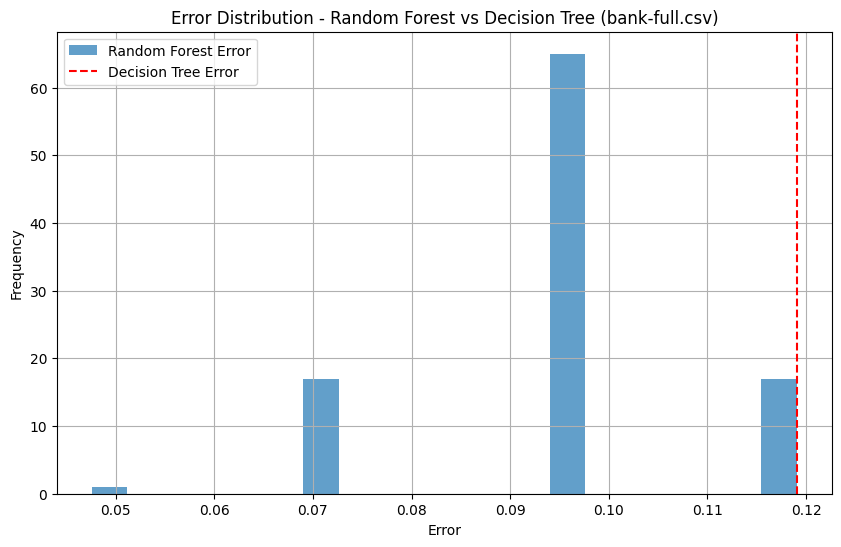

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, alpha=0.7, label="Random Forest Error")
plt.axvline(dt_error, color='red', linestyle='--', label="Decision Tree Error")
plt.title("Error Distribution - Random Forest vs Decision Tree (bank-full.csv)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig("C:/ML/Labwork4/visualizations/RandomForest/RandomForest_vs_DecisionTree_bank_full.png")
plt.show()